In [1]:
#import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#import other libraries for data processing
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing# Data Prepocessing

# Data Prepocessing

In [3]:
df = pd.read_csv('./UCI_Credit_Card.csv')

In [4]:
df.drop(columns='ID', inplace = True)

In [5]:
X = df[[col for col in df.columns if col != 'default.payment.next.month']]
y = df['default.payment.next.month']

In [6]:
#Normalizing Data
x = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

In [7]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#Imbalance class
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_sample(X, y)

In [9]:
#Validation split
X_train, X_val, y_train, y_val = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

###### Loading data into keras

In [10]:
Train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

In [11]:
for feat, targ in Train_dataset.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [0.10433662 1.         0.39451124 0.66666667 0.27760694 0.33670674
 0.4        0.2        0.2        0.4        0.2        0.20548333
 0.12344162 0.11673581 0.21148353 0.12881351 0.29538428 0.
 0.00140634 0.00521727 0.         0.00376801 0.002677  ], Target: 1
Features: [2.02020202e-02 1.00000000e+00 5.00000000e-01 3.33333333e-01
 6.37931034e-01 4.00000000e-01 4.00000000e-01 4.00000000e-01
 4.00000000e-01 4.00000000e-01 4.00000000e-01 1.70039404e-01
 9.24629973e-02 1.01665630e-01 1.85720234e-01 1.09640507e-01
 2.83872564e-01 2.06055278e-03 5.93732912e-04 0.00000000e+00
 4.05475040e-03 2.77824017e-03 2.26986415e-03], Target: 1
Features: [0.05050505 0.         0.33333333 0.33333333 0.34482759 0.2
 0.2        0.2        0.2        0.2        0.2        0.23115661
 0.11961188 0.11348102 0.17609595 0.09388451 0.27237223 0.00572376
 0.00280895 0.00223204 0.01610306 0.00703352 0.00945777], Target: 0
Features: [0.14735758 0.         0.33333333 0.33333333 0.27130173 0.4
 0.4        0.

In [12]:
for feat, targ in Train_dataset.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [0.10433662 1.         0.39451124 0.66666667 0.27760694 0.33670674
 0.4        0.2        0.2        0.4        0.2        0.20548333
 0.12344162 0.11673581 0.21148353 0.12881351 0.29538428 0.
 0.00140634 0.00521727 0.         0.00376801 0.002677  ], Target: 1
Features: [2.02020202e-02 1.00000000e+00 5.00000000e-01 3.33333333e-01
 6.37931034e-01 4.00000000e-01 4.00000000e-01 4.00000000e-01
 4.00000000e-01 4.00000000e-01 4.00000000e-01 1.70039404e-01
 9.24629973e-02 1.01665630e-01 1.85720234e-01 1.09640507e-01
 2.83872564e-01 2.06055278e-03 5.93732912e-04 0.00000000e+00
 4.05475040e-03 2.77824017e-03 2.26986415e-03], Target: 1
Features: [0.05050505 0.         0.33333333 0.33333333 0.34482759 0.2
 0.2        0.2        0.2        0.2        0.2        0.23115661
 0.11961188 0.11348102 0.17609595 0.09388451 0.27237223 0.00572376
 0.00280895 0.00223204 0.01610306 0.00703352 0.00945777], Target: 0
Features: [0.14735758 0.         0.33333333 0.33333333 0.27130173 0.4
 0.4        0.

In [13]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
45038,0.104337,1.0,0.394511,0.666667,0.277607,0.336707,0.4,0.2,0.2,0.4,...,0.116736,0.211484,0.128814,0.295384,0.000000,0.001406,0.005217,0.000000,0.003768,0.002677
14976,0.020202,1.0,0.500000,0.333333,0.637931,0.400000,0.4,0.4,0.4,0.4,...,0.101666,0.185720,0.109641,0.283873,0.002061,0.000594,0.000000,0.004055,0.002778,0.002270
14304,0.050505,0.0,0.333333,0.333333,0.344828,0.200000,0.2,0.2,0.2,0.2,...,0.113481,0.176096,0.093885,0.272372,0.005724,0.002809,0.002232,0.016103,0.007034,0.009458
35234,0.147358,0.0,0.333333,0.333333,0.271302,0.400000,0.4,0.2,0.2,0.2,...,0.137484,0.248681,0.182455,0.340268,0.000000,0.002550,0.005580,0.017263,0.009723,0.010793
25941,0.202020,1.0,0.333333,0.333333,0.224138,0.100000,0.1,0.1,0.2,0.2,...,0.103800,0.191170,0.110414,0.284538,0.001557,0.018877,0.002168,0.001319,0.001789,0.004313


# Building Model

In [14]:
# Read data from pandas df
Train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

In [15]:
# Shuffle dataset and create batches
Train_dataset = Train_dataset.shuffle(len(df)).batch(10)

In [16]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(10, activation='relu', name="dense_1"),
tf.keras.layers.Dense(10, activation='relu', name="dense_2"),
tf.keras.layers.Dense(1, activation="sigmoid", name="predictions")
])

model.compile(optimizer='adam',
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [17]:
tf.keras.backend.set_floatx('float64')

model.fit(Train_dataset, epochs=10, validation_data=(X_val, y_val))

In [18]:
#Try another model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', name="dense_1"),
    tf.keras.layers.Dense(16, activation='relu', name="dense_2"),
    tf.keras.layers.Dense(16, activation='relu', name="dense_3"),
    tf.keras.layers.Dense(1, activation="sigmoid", name="predictions")
])

model.compile(optimizer='adam',
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=['accuracy'])

tf.keras.backend.set_floatx('float64')

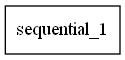

In [25]:
tf.keras.utils.plot_model(model)
#It isn't seems right because the model has not been built because it does not know its input shape.

In [26]:
#Adding back input shape
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(23,)),
    tf.keras.layers.Dense(16, activation='relu', name="dense_1"),
    tf.keras.layers.Dense(16, activation='relu', name="dense_2"),
    tf.keras.layers.Dense(16, activation='relu', name="dense_3"),
    tf.keras.layers.Dense(1, activation="sigmoid", name="predictions")
])


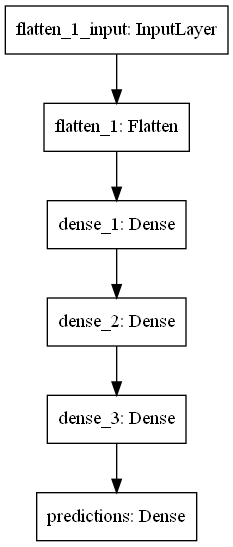

In [27]:
#It works
tf.keras.utils.plot_model(model)

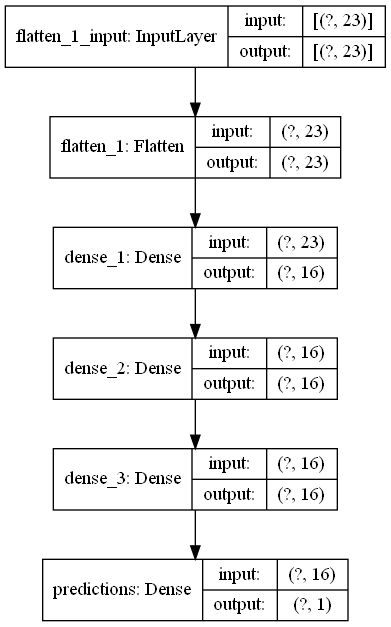

In [32]:
#It works
tf.keras.utils.plot_model(model,show_shapes=True)

In [30]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=['accuracy'])

tf.keras.backend.set_floatx('float64')

model.fit(Train_dataset, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
3739/3739 [==============================] - 4s 1ms/step - loss: 0.6457 - accuracy: 0.6572 - val_loss: 0.6364 - val_accuracy: 0.6803
Epoch 2/10
3739/3739 [==============================] - 4s 969us/step - loss: 0.6338 - accuracy: 0.6848 - val_loss: 0.6355 - val_accuracy: 0.6818
Epoch 3/10
3739/3739 [==============================] - 7s 2ms/step - loss: 0.6333 - accuracy: 0.6860 - val_loss: 0.6353 - val_accuracy: 0.6814
Epoch 4/10
3739/3739 [==============================] - 6s 2ms/step - loss: 0.6329 - accuracy: 0.6873 - val_loss: 0.6351 - val_accuracy: 0.6799
Epoch 5/10
3739/3739 [==============================] - 4s 941us/step - loss: 0.6328 - accuracy: 0.6877 - val_loss: 0.6366 - val_accuracy: 0.6702
Epoch 6/10
3739/3739 [==============================] - 4s 968us/step - loss: 0.6330 - accuracy: 0.6872 - val_loss: 0.6353 - val_accuracy: 0.6791
Epoch 7/10
3739/3739 [==============================] - 4s 957us/step - loss: 0.6327 - accuracy: 0.6873 - val_loss: 0.6356 - val_a

In [34]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
47/47 [==============================] - 0s 1ms/step - loss: 0.7022 - accuracy: 0.8062
test loss, test acc: [0.7022289187113444, 0.8061666666666667]


In [36]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [38]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

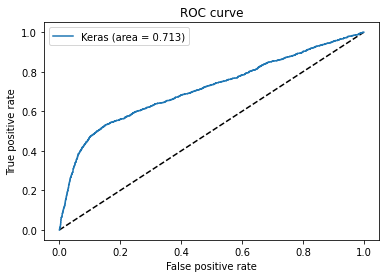

In [41]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()